In [1]:
from brian2 import * 

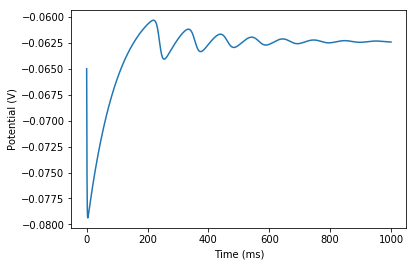

0


In [3]:
start_scope()

a = 0.02/ms
b = 0.2/ms
c = -65*mV
d = 2*mV/ms

eqs = '''
        dv/dt = (0.04/ms/mV) * v**2 + (5/ms)*v + 140*mV/ms - u + I : volt #(unless refractory)
        du/dt = a*(b*v - u) : volt/second
        I : volt/second
        '''

reset = '''
v = c
u += d
'''

testGroup = NeuronGroup(1, eqs, threshold='v > 30*mV', reset=reset, refractory='5*ms', method='rk2')
#Resonating
testGroup.I = 3.7743*mV/ms
testGroup.v = -65*mV

M = StateMonitor(testGroup, 'v', record=True)
sM = SpikeMonitor(testGroup)

run(1000*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('Potential (V)')
show()

print(sM.count[0])